In [56]:
# import modules
import pandas as pd
pd.options.display.max_colwidth=500
import tweepy
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import nltk
import typing
nltk.download('stopwords')
nltk.download('wordnet')
import re
#Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
#packages to build our knn model
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Karim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [57]:
     # Enter your own credentials obtained
        # from your developer account
        consumer_key = "AKJRvPwuZS686p1dxkTx3WDnV"
        consumer_secret = "MZ2dakCiJtGBzBkpfTVMFHIlPlwJjYV1bOZg5RN0qIRKxi8d6i"
        access_key = "1498368813867413505-CosP8pC5BUHY9W730ZbjcNhaA9Gk0m"
        access_secret = "eBAL5p7c4DYZVGsIPpRYHQObsAt1HEBsomcGYjUEAwT47"
 

In [58]:
alltweets = []
# Defining the function to get the tweets
def get_all_tweets(screen_name):
    auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    alltweets.extend(new_tweets)
    
    oldest = alltweets[-1].id - 1
    while len(new_tweets)>0:
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        #save most recent tweets
        alltweets.extend(new_tweets)
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        print ("...%s tweets downloaded so far" % (len(alltweets)))                # tweet.get('user', {}).get('location', {})
 
    totaltweets = [[tweet.created_at,tweet._json["user"]["name"],tweet.user.description,tweet.user.statuses_count,tweet.entities["hashtags"],tweet.entities["user_mentions"],tweet.favorite_count,
                  tweet.lang,tweet.user.friends_count,tweet.user.followers_count,tweet.retweet_count,tweet.retweeted,tweet.text,
                  tweet._json["user"]["location"]] for tweet in alltweets]
     
    tweets_df = pd.DataFrame(columns = ["time","name","totaltweets","description","hashtags","user_mentions","favorite_count",
                                    "lang","following","followers_count","retweet_count","retweeted",
                                    "text","location"])
    tweets_df["time"]  = pd.Series([str(i[0]) for i in totaltweets])
    tweets_df["name"] = pd.Series([str(i[1]) for i in totaltweets])
    tweets_df["description"] = pd.Series([str(i[2]) for i in totaltweets])
    tweets_df["totaltweets"] = pd.Series([str(i[3]) for i in totaltweets])            
    tweets_df["hashtags"] = pd.Series([str(i[4]) for i in totaltweets])
    tweets_df["user_mentions"] = pd.Series([str(i[5]) for i in totaltweets])
    tweets_df["favorite_count"] = pd.Series([str(i[6]) for i in totaltweets])
    tweets_df["lang"] = pd.Series([str(i[7]) for i in totaltweets])
    tweets_df["following"] = pd.Series([str(i[8]) for i in totaltweets])
    tweets_df["followers_count"] = pd.Series([str(i[9]) for i in totaltweets])
    tweets_df["retweet_count"] = pd.Series([str(i[10]) for i in totaltweets])
    tweets_df["retweeted"] = pd.Series([str(i[11]) for i in totaltweets])
    tweets_df["text"] = pd.Series([str(i[12]) for i in totaltweets])
    tweets_df["location"] = pd.Series([str(i[13]) for i in totaltweets])
    tweets_df.to_csv(screen_name+"_tweets.csv")
    return tweets_df

In [59]:
hannatweets = get_all_tweets("@HannaLiubakova")

...400 tweets downloaded so far
...600 tweets downloaded so far
...799 tweets downloaded so far
...999 tweets downloaded so far
...1199 tweets downloaded so far
...1399 tweets downloaded so far
...1599 tweets downloaded so far
...1799 tweets downloaded so far
...1999 tweets downloaded so far
...2198 tweets downloaded so far
...2398 tweets downloaded so far
...2598 tweets downloaded so far
...2798 tweets downloaded so far
...2998 tweets downloaded so far
...3198 tweets downloaded so far
...3248 tweets downloaded so far
...3248 tweets downloaded so far


In [60]:
#overview of hanna tweets
hannatweets.head()

,time,name,totaltweets,description,hashtags,user_mentions,favorite_count,lang,following,followers_count,retweet_count,retweeted,text,location
0,2022-05-02 10:40:54+00:00,Hanna Liubakova,18256,"Journalist from Minsk, Belarus. Non-resident fellow @AtlanticCouncil. Media trainer. Formerly @RFERL, @Belsat_TV. 2019 @worldpressinst fellow. DM for Signal","[{'text': 'Ukraine', 'indices': [0, 8]}]",[],216,en,1419,137307,113,False,"#Ukraine One of the best educational institutions in the Lugansk region, the Lysychansk gymnasium, burned to the gr… https://t.co/u1mBZwGjMj",Moving around
1,2022-05-02 10:09:20+00:00,Hanna Liubakova,18256,"Journalist from Minsk, Belarus. Non-resident fellow @AtlanticCouncil. Media trainer. Formerly @RFERL, @Belsat_TV. 2019 @worldpressinst fellow. DM for Signal","[{'text': 'Russia', 'indices': [0, 7]}]",[],497,en,1419,137307,268,False,"#Russia The Kremlin is considering holding a ""parade of prisoners of war"". During the Victory Parade in Moscow, up… https://t.co/3knY7aKrBl",Moving around
2,2022-05-02 06:52:54+00:00,Hanna Liubakova,18256,"Journalist from Minsk, Belarus. Non-resident fellow @AtlanticCouncil. Media trainer. Formerly @RFERL, @Belsat_TV. 2019 @worldpressinst fellow. DM for Signal","[{'text': 'Russia', 'indices': [0, 7]}]",[],542,en,1419,137307,259,False,#Russia A Russian missile destroyed an agricultural warehouse with grain. Russians would still claim that they bomb… https://t.co/4GcIeofXlL,Moving around
3,2022-05-01 21:43:40+00:00,Hanna Liubakova,18256,"Journalist from Minsk, Belarus. Non-resident fellow @AtlanticCouncil. Media trainer. Formerly @RFERL, @Belsat_TV. 2019 @worldpressinst fellow. DM for Signal",[],"[{'screen_name': 'thankyou_nurses', 'name': 'Blue dot #StandsWithUkraine', 'id': 1419348314181578754, 'id_str': '1419348314181578754', 'indices': [0, 16]}, {'screen_name': 'lakitukl', 'name': 'lakitukl', 'id': 1388370208323096576, 'id_str': '1388370208323096576', 'indices': [17, 26]}, {'screen_name': 'joliefans', 'name': 'Angelina Jolie Fans', 'id': 28970983, 'id_str': '28970983', 'indices': [27, 37]}]",0,en,1419,137307,0,False,@thankyou_nurses @lakitukl @joliefans But why does he need to be impressed? And do what? Film her as everybody else in the cafe?,Moving around
4,2022-05-01 21:14:51+00:00,Hanna Liubakova,18256,"Journalist from Minsk, Belarus. Non-resident fellow @AtlanticCouncil. Media trainer. Formerly @RFERL, @Belsat_TV. 2019 @worldpressinst fellow. DM for Signal",[],[],419,en,1419,137307,54,False,"Maria Zakharova, we demand to explain this as well - Gandalf has arrived in Lviv! https://t.co/Xxe12bZ4vi",Moving around


In [61]:
hannatweets.describe(exclude='number')

,time,name,totaltweets,description,hashtags,user_mentions,favorite_count,lang,following,followers_count,retweet_count,retweeted,text,location
count,3248,3248,3248,3248,3248,3248,3248,3248,3248,3248,3248,3248,3248,3248
unique,3242,1,1,1,530,711,1073,17,1,2,675,1,3246,1
top,2021-07-04 08:35:16+00:00,Hanna Liubakova,18256,"Journalist from Minsk, Belarus. Non-resident fellow @AtlanticCouncil. Media trainer. Formerly @RFERL, @Belsat_TV. 2019 @worldpressinst fellow. DM for Signal",[],[],0,en,1419,137307,0,False,RT @Tsihanouskaya: How can 🇪🇺 use sanctions on Belarus as an effective policy tool? This is a topic for the upcoming discussion of the Rese…,Moving around
freq,3,3248,3248,3248,1280,2399,347,3134,3248,2398,215,3248,2,3248


In [62]:
hannatweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3248 entries, 0 to 3247
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   time             3248 non-null   object
 1   name             3248 non-null   object
 2   totaltweets      3248 non-null   object
 3   description      3248 non-null   object
 4   hashtags         3248 non-null   object
 5   user_mentions    3248 non-null   object
 6   favorite_count   3248 non-null   object
 7   lang             3248 non-null   object
 8   following        3248 non-null   object
 9   followers_count  3248 non-null   object
 10  retweet_count    3248 non-null   object
 11  retweeted        3248 non-null   object
 12  text             3248 non-null   object
 13  location         3248 non-null   object
dtypes: object(14)
memory usage: 355.4+ KB


In [63]:
#hanna is using the ukraine hashtag
hannatweets['hashtags'].value_counts().loc[lambda x : x>5].to_frame()

,hashtags
[],1280
"[{'text': 'Belarus', 'indices': [0, 8]}]",809
"[{'text': 'Ukraine', 'indices': [0, 8]}]",178
"[{'text': 'Russia', 'indices': [0, 7]}]",52
"[{'text': 'Belarus', 'indices': [56, 64]}]",11
"[{'text': 'Kazakhstan', 'indices': [0, 11]}]",11
"[{'text': 'Belarus', 'indices': [0, 8]}, {'text': 'Lukashenko', 'indices': [9, 20]}]",9
"[{'text': 'Belarus', 'indices': [78, 86]}]",9
"[{'text': 'Belarus', 'indices': [15, 23]}]",9
"[{'text': 'Belarus', 'indices': [38, 46]}]",8


In [64]:
#display the most user mentions
hannatweets['user_mentions'].value_counts().loc[lambda x : x>5].to_frame()

,user_mentions
[],2399
"[{'screen_name': 'Tsihanouskaya', 'name': 'Sviatlana Tsikhanouskaya', 'id': 1312028370088144896, 'id_str': '1312028370088144896', 'indices': [3, 17]}]",25
"[{'screen_name': 'franakviacorka', 'name': 'Franak Viačorka', 'id': 81572408, 'id_str': '81572408', 'indices': [3, 18]}]",12
"[{'screen_name': 'RikardJozwiak', 'name': 'Rikard Jozwiak', 'id': 601811574, 'id_str': '601811574', 'indices': [3, 17]}]",7
"[{'screen_name': 'NorwayMFA', 'name': 'Norway MFA', 'id': 966113328, 'id_str': '966113328', 'indices': [3, 13]}]",6


In [92]:
#which tweet got the most like
print(hannatweets ['favorite_count'].max())
hannatweets .loc[hannatweets ['favorite_count'] == hannatweets ['favorite_count'].max()]['text']

96346


668    #Ukraine Irpin. Andriy Kulik is trying to comfort his dog, paralyzed by fear. The dog refuses to walk after shellin… https://t.co/R8ZY58PUdS
Name: text, dtype: object

In [93]:
#which tweet got the most retweet
print(hannatweets ['retweet_count'].max())
hannatweets .loc[hannatweets ['retweet_count'] == hannatweets ['retweet_count'].max()]['text']

140221


933    RT @elonmusk: @FedorovMykhailo Starlink service is now active in Ukraine. More terminals en route.
Name: text, dtype: object

In [67]:
sid_analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text:str, analyser,desired_type:str='pos'):
    # Get sentiment from text
    sentiment_score = analyser.polarity_scores(text)
    return sentiment_score[desired_type]

# Get Sentiment scores
def get_sentiment_scores(df,data_column):
    df[f'{data_column} Positive Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'pos'))
    df[f'{data_column} Negative Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'neg'))
    return df
#find all top scoring tweets
def print_top_n_tweets(df,data_column,number_of_rows):
    for index,row in df.nlargest(number_of_rows,data_column).iterrows():
        print(f"Score: {row[data_column]}, Tweet: {row[0]}")

In [68]:
hannatweets  = get_sentiment_scores(hannatweets ,'text')
tweet_sentiment = hannatweets [['text','text Positive Sentiment Score','text Negative Sentiment Score']]

In [69]:
tweet_sentiment.head()

,text,text Positive Sentiment Score,text Negative Sentiment Score
0,"#Ukraine One of the best educational institutions in the Lugansk region, the Lysychansk gymnasium, burned to the gr… https://t.co/u1mBZwGjMj",0.189,0.000
1,"#Russia The Kremlin is considering holding a ""parade of prisoners of war"". During the Victory Parade in Moscow, up… https://t.co/3knY7aKrBl",0.000,0.155
2,#Russia A Russian missile destroyed an agricultural warehouse with grain. Russians would still claim that they bomb… https://t.co/4GcIeofXlL,0.000,0.167
3,@thankyou_nurses @lakitukl @joliefans But why does he need to be impressed? And do what? Film her as everybody else in the cafe?,0.183,0.000
4,"Maria Zakharova, we demand to explain this as well - Gandalf has arrived in Lviv! https://t.co/Xxe12bZ4vi",0.142,0.089


In [70]:
#Top positive tweets
print_top_n_tweets(tweet_sentiment,'text Positive Sentiment Score',10)

Score: 0.815, Tweet: @franakviacorka Great!
Score: 0.807, Tweet: @LT_OSCE Congratulations!
Score: 0.787, Tweet: @JJansaSDS Congrats!
Score: 0.77, Tweet: @I_love_realism Happy to help!
Score: 0.761, Tweet: @FiorellaCDMX Thanks!
Score: 0.75, Tweet: @Magnus919 :)
Score: 0.75, Tweet: @Lana_Tod :)
Score: 0.747, Tweet: @jayar12 good one :)
Score: 0.737, Tweet: @JasperPinstripe Yes, land, thanks
Score: 0.73, Tweet: @StormyPlanet Yes


In [71]:
#Top negative tweets
print_top_n_tweets(tweet_sentiment,'text Negative Sentiment Score',10)

Score: 0.697, Tweet: @shaunwalker7 Jealousy
Score: 0.688, Tweet: @anne_sknk no
Score: 0.608, Tweet: It also hurts
Score: 0.571, Tweet: @andreivaitovich @YouTube What about propagating violence and torture?
Score: 0.527, Tweet: #Belarus People in the Akrescina detention center were severely beaten by riot police, they were screaming terribly… https://t.co/TScx89e51F
Score: 0.524, Tweet: The threat of sanctions is scary indeed https://t.co/WxwUCHA73Y
Score: 0.508, Tweet: @GuyDahan5 I saw it. Terrible
Score: 0.494, Tweet: #Belarus Journalists were shot, beaten, injured, jailed, fined, threatened. Just a moment ago, #Lukashenko has anno… https://t.co/amPG0f6nLr
Score: 0.492, Tweet: @TeeKay_EV Arrests for candles?
Score: 0.489, Tweet: Devastating. 27-year-old Dzmitry Uschopau was detained on December 31 and beaten at a police station. He died. The… https://t.co/y795HfSbI4


In [72]:
hannatweets ['retweet_count']= hannatweets ['retweet_count'].astype('int64')
hannatweets ['favorite_count']= hannatweets ['favorite_count'].astype('int64')

In [73]:
features= hannatweets[['retweet_count','favorite_count','text Positive Sentiment Score','text Negative Sentiment Score']]
features.corr()

,retweet_count,favorite_count,text Positive Sentiment Score,text Negative Sentiment Score
retweet_count,1.000000,0.289787,0.011564,-0.002352
favorite_count,0.289787,1.000000,-0.013110,0.020184
text Positive Sentiment Score,0.011564,-0.013110,1.000000,-0.211272
text Negative Sentiment Score,-0.002352,0.020184,-0.211272,1.000000


<AxesSubplot:>

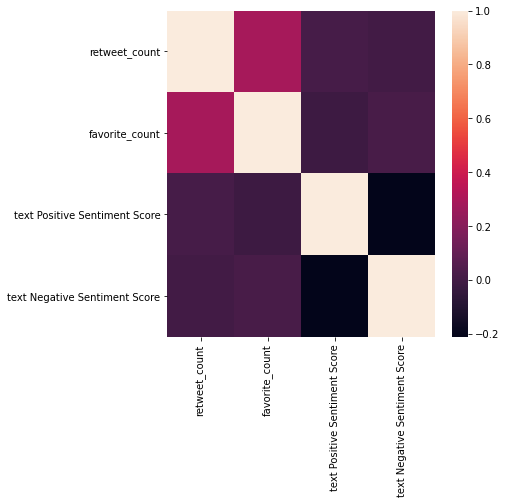

In [74]:
#correlation map
plt.figure(figsize= (6, 6))
sns.heatmap(features.corr())

In [75]:
 #Import english stop words

stopcorpus: typing.List = stopwords.words('english')

In [76]:
# Convert to lowercase, and remove stop words

def remove_links(text):
    # Remove any hyperlinks that may be in the text starting with http
    return re.sub(r"http\S+", "", text)

def style_text(text:str):
    # Convert to lowercase
    return text.lower()

def remove_words(text_data:str,list_of_words_to_remove: typing.List):
    # Remove all words as specified in a custom list of words
    return [item for item in text_data if item not in list_of_words_to_remove]

def collapse_list_to_string(string_list):
    # This is to join back together the text data into a single string
    return ' '.join(string_list)

def remove_apostrophes(text):
    # Remove any apostrophes as these are irrelavent in our word cloud
    text = text.replace("'", "")
    text = text.replace('"', "")
    text = text.replace('`', "")
    return text

def remove_others(text):
    
    text = re.sub(r'@[A-Za-z0-9]+','',text) # Remove @mentions
    text = re.sub(r'#','',text) # Remove hashtag symbols
    text = re.sub(r'RT[\s]+','',text) # Remove retweets
    text = re.sub(r'Ukraine','',text) 
    text = re.sub(r'ukraine','',text) 
    text = re.sub(r'ukrainian','',text)
    text = re.sub(r'amp','',text)
    text = re.sub(r'rt','',text)
    text = re.sub(r'Russia','',text) 
    text = re.sub(r'russia','',text)  
    text = re.sub(r'belarus','',text) 
    text = re.sub(r'belarussian','',text) 
    return text

In [77]:
tweet_sentiment['cleaned_text'] = tweet_sentiment.loc[:,'text'].astype(str).apply(remove_links)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].astype(str).apply(style_text)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].astype(str).apply(lambda x: remove_words(x.split(),stopcorpus))

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].apply(collapse_list_to_string)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].apply(remove_apostrophes)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].apply(remove_others)

<ipython-input-77-2ade89cc017e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-77-2ade89cc017e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-77-2ade89cc017e>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-77-2ade89c

In [78]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]


tweet_sentiment['clean_lemmatized'] = tweet_sentiment['cleaned_text'].astype(str).apply(lemmatize_text)

tweet_sentiment['clean_lemmatized'] = tweet_sentiment['clean_lemmatized'].apply(collapse_list_to_string)

display(tweet_sentiment['clean_lemmatized'].head(5))

<ipython-input-78-3e2f8e3d0251>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-78-3e2f8e3d0251>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0    one best educational institution lugansk region, lysychansk gymnasium, burned gr…
1          kremlin considering holding parade prisoner war. victory parade moscow, up…
2          n missile destroyed agricultural warehouse grain. n would still claim bomb…
3                              _nurses need impressed? what? film everybody else cafe?
4                         maria zakharova, demand explain well - gandalf arrived lviv!
Name: clean_lemmatized, dtype: object

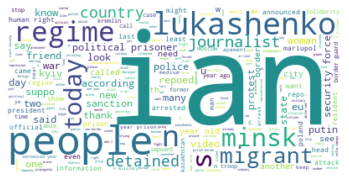

In [79]:
def plot_wordcloud(series,output_filename='wordcloud'):

    wordcloud = WordCloud(max_font_size=150, max_words=500, background_color="white").generate(' '.join(series.astype(str)))

    wordcloud.to_file(output_filename + '.png')

    plt.imshow(wordcloud, interpolation='bilinear')

    plt.axis("off")

plot_wordcloud(tweet_sentiment['clean_lemmatized'],'overall-wordcloud')

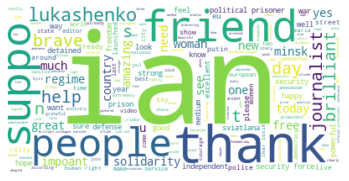

In [80]:
def plot_wordcloud_top_n(df,number_of_tweets,score_column,data_column,output_filename):
    sliced_df = df.nlargest(number_of_tweets,score_column)

    plot_wordcloud(sliced_df[data_column],output_filename)


plot_wordcloud_top_n(tweet_sentiment,500,'text Positive Sentiment Score','clean_lemmatized','positive-wordcloud')

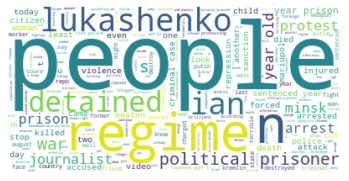

In [94]:
plot_wordcloud_top_n(tweet_sentiment,500,'text Negative Sentiment Score','clean_lemmatized','negative-wordcloud')

In [95]:
#retweets distribution over time
fig = px.line(hannatweets , x="time", y= hannatweets['retweet_count'])
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y",
    ticklabelmode="period")
fig.show()

In [96]:
df=hannatweets [['time', 'retweet_count','text Positive Sentiment Score','text Negative Sentiment Score']]
pos=hannatweets [['time', 'retweet_count','text Positive Sentiment Score']]
neg =hannatweets [['time', 'retweet_count','text Negative Sentiment Score']]
df[(df['time']>='2022-03-01') & (df['time']<='2022-04-01')]

,time,retweet_count,text Positive Sentiment Score,text Negative Sentiment Score
431,2022-03-31 20:35:31+00:00,277,0.142,0.000
432,2022-03-31 19:51:45+00:00,753,0.399,0.131
433,2022-03-31 19:12:20+00:00,417,0.124,0.153
434,2022-03-31 19:04:28+00:00,40,0.067,0.266
435,2022-03-31 14:25:07+00:00,0,0.000,0.363
...,...,...,...,...
863,2022-03-01 08:58:49+00:00,140,0.217,0.000
864,2022-03-01 08:39:23+00:00,198,0.000,0.000
865,2022-03-01 07:25:07+00:00,170,0.000,0.000
866,2022-03-01 06:41:32+00:00,242,0.222,0.196


In [97]:
#how retweets via sentiments are having an evolution over time
fig = go.Figure()
for col in pos.columns:
    fig.add_trace(go.Scatter(x=pos['time'], y=pos['text Positive Sentiment Score'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green'
                             )
                 )
for col in neg.columns:
    fig.add_trace(go.Scatter(x=neg['time'], y=neg['text Negative Sentiment Score'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red'
                             )
                 )
fig.show()

In [98]:

hannatweets  ["is_viral"] = hannatweets  .retweet_count.apply(
    lambda row: 1 if row >= hannatweets  .retweet_count.mean()  else 0)

print(hannatweets  .is_viral.value_counts())


0    2824
1     424
Name: is_viral, dtype: int64


In [99]:
hannatweets  ['tweet_length'] = hannatweets  .apply(lambda tweet: len(tweet['text']), axis=1)
hannatweets  ["followers_count"] = hannatweets  .apply(lambda tweet: tweet["followers_count"], axis=1)
hannatweets  ["friends_count"] = hannatweets  .apply(lambda tweet: tweet["following"], axis=1)

hannatweets  ["hashtag_count"] = hannatweets  .apply(lambda tweet: tweet.text.count("#"), axis=1)
hannatweets  ["link_count"] = hannatweets  .apply(lambda tweet: tweet.text.count("http"), axis=1)
hannatweets  ["word_count"] = hannatweets  .apply(lambda tweet: len(tweet.text.split()), axis=1)

def find_avg_word_length(str):
    #function to find average word length of a string
    sum = 0
    for i in range(0, len(str.split())):
        sum = sum + len(str.split()[i])
    avg = sum/len(str.split())
    return avg

hannatweets  ["avg_length_of_words"] = hannatweets  .text.apply(find_avg_word_length)

In [100]:


labels = hannatweets  [["is_viral"]]
features = hannatweets  [["tweet_length", "followers_count", "friends_count",'text Positive Sentiment Score','text Negative Sentiment Score']]
scaled_features = scale(features, axis=0)

features2 = hannatweets  [["tweet_length", "followers_count", "friends_count", "hashtag_count", "link_count", "word_count", "favorite_count"]]
scaled_features2 = scale(features2, axis=0)

features3 = hannatweets  [["tweet_length", "followers_count", "friends_count", "hashtag_count", "link_count", "word_count", "favorite_count",'text Positive Sentiment Score','text Negative Sentiment Score']]
scaled_features3 = scale(features3, axis=0)

print(features.loc[0])
print(scaled_features[0])

tweet_length                        140
followers_count                  137307
friends_count                      1419
text Positive Sentiment Score     0.189
text Negative Sentiment Score       0.0
Name: 0, dtype: object
[ 0.33608838 -0.59536716  0.          0.94724692 -0.81403727]


In [101]:


train_data, test_data, train_labels, test_labels = train_test_split(scaled_features3, labels, 
                                                                    test_size = 0.2,
                                                                    random_state=1)

In [102]:


classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(train_data, train_labels)
classifier.score(test_data, test_labels)

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.9184615384615384

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\sit

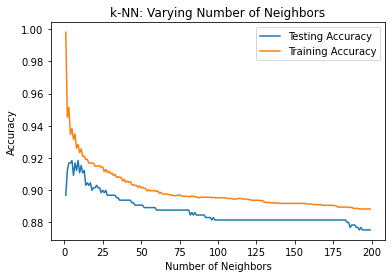

In [90]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 200)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
 # Setup a k-NN Classifier with k neighbors: knn
 knn = KNeighborsClassifier(n_neighbors=k)
 # Fit the classifier to the training data
 knn.fit(train_data, train_labels)
 
 #Compute accuracy on the training set
 train_accuracy[i] = knn.score(train_data, train_labels)
 #Compute accuracy on the testing set
 test_accuracy[i] = knn.score(test_data, test_labels)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [91]:
#lets find best_k

best_score = 0
best_k = 0

for k in range(1, 200):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    if classifier.score(test_data, test_labels) > best_score:
        best_score = classifier.score(test_data, test_labels)
        best_k = k

print(best_k)
print(best_score)

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\sit

5
0.9184615384615384


In [103]:
hannatweets.to_csv('hannatweets')